In [1]:
print('hello world')

hello world


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataframe = pd.read_csv('Arquivo-Treino.csv')
dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

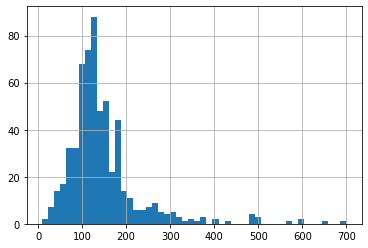

In [8]:
dataframe['LoanAmount'].hist(bins=50)

<AxesSubplot:>

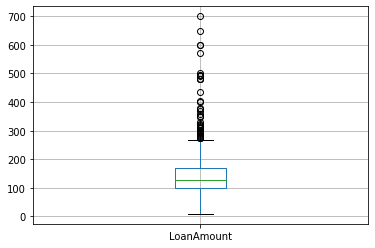

In [9]:
dataframe.boxplot(column='LoanAmount')


<AxesSubplot:xlabel='Credit_History'>

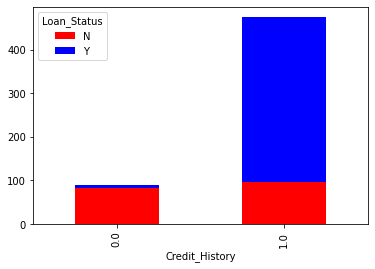

In [10]:
temp = pd.crosstab(dataframe['Credit_History'], dataframe['Loan_Status'])

temp.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)


In [12]:
#aplica função em todo dataframe
dataframe.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
dataframe['Gender'].fillna(dataframe['Gender'].mode()[0], inplace=True)
dataframe['Married'].fillna(dataframe['Married'].mode()[0], inplace=True)
dataframe['Dependents'].fillna(dataframe['Dependents'].mode()[0], inplace=True)
dataframe['Self_Employed'].fillna('Yes', inplace=True)
dataframe['LoanAmount'].fillna(dataframe['LoanAmount'].mean(), inplace=True)
dataframe['Loan_Amount_Term'].fillna(dataframe['Loan_Amount_Term'].mode()[0], inplace=True)
dataframe['Credit_History'].fillna(0, inplace=True)

dataframe.apply(lambda x: sum(x.isnull()), axis=0 )





Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for i in var_mod:
    dataframe[i] = le.fit_transform(dataframe[i])

dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [22]:
df_x = dataframe.drop(axis=1, columns=['Loan_ID', 'LoanAmount', 'Loan_Status'])
df_x
df_y = dataframe[['LoanAmount']]
df_y



,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000
...,...
609,71.000000
610,40.000000
611,253.000000
612,187.000000


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=8)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)

In [25]:
print(model.intercept_)
print(model.coef_)

[44.94926124]
[[ 3.95917720e+00  1.05662653e+01  5.37634766e+00 -1.62510499e+01
   1.26662860e+01  8.64852503e-03  6.94668242e-03  1.17526234e-01
  -2.30127779e+00 -5.54877566e+00]]


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predict = model.predict(x_train)

y_predict

print(mean_absolute_error(y_train,y_predict))
print(mean_squared_error(y_train,y_predict))
print(mean_absolute_error(y_train,y_predict)/y_train.mean())


41.69074629216305
4628.067018467278
LoanAmount    0.280846
dtype: float64


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predict = model.predict(x_test)

print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict)/y_test.mean())

35.88473369468219
3088.7714637726217
LoanAmount    0.253256
dtype: float64
